In [38]:
#Importar Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**1. Baixar a base de dados**

In [39]:
# Baixar o arquivo diretamente da web. Descomentar as 2 linhas abaixo

url = "https://one.s3.es.gov.br/pr-dl-sesp/publico/MICRODADOS_OCORRENCIAS.csv"
MICRODADOS_OCORRENCIAS= pd.read_csv(url, encoding = "ISO-8859-1", sep=';', header=0, )

# Salvar a base de dados como.csv . Descomentar a linha abaixo
MICRODADOS_OCORRENCIAS.reset_index(drop = True, inplace = True)
MICRODADOS_OCORRENCIAS.to_csv('MICRODADOS_OCORRENCIAS.csv')

**2. Etapa de tratamento e limpeza da base de dados**

In [40]:
# Importar o arquivo /content/MICRODADOS_OCORRENCIAS.csv para tratamento
MICRODADOS_OCORRENCIAS = pd.read_csv('MICRODADOS_OCORRENCIAS.csv', index_col=0)

Remove espaços extras de todas as colunas;

Converte a coluna Data para o formato YYYY-MM;

Remove os : (dois pontos) dos dados da coluna TipoIncidente;

In [41]:
# Carregar os dados
file_path = "MICRODADOS_OCORRENCIAS.csv"
df = pd.read_csv(file_path, sep=",", encoding="utf-8", low_memory=False)

# 1. Remover espaços antes/depois de cada dado em todas as colunas (apenas se for string)
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# 2. Modificar a coluna "Data" para o formato ano-mês (YYYY-MM)
if "Data" in df.columns:
    df["Data"] = pd.to_datetime(df["Data"], errors="coerce").dt.to_period("M").astype(str)

# 3. Remover ":" da coluna "TipoIncidente"
if "TipoIncidente" in df.columns:
    df["TipoIncidente"] = df["TipoIncidente"].str.replace(":", "", regex=False)

# Salvar o arquivo tratado
df.to_csv("MICRODADOS_OCORRENCIAS_TRATADO.csv", index=False)


**3. Preparar um dataframe para trabalhar apenas com a cidade de LInhares**

In [42]:
# importar a base de dados MICRODADOS_OCORRENCIAS_TRATADO.csv
MICRODADOS_OCORRENCIAS_TRATADO = pd.read_csv('MICRODADOS_OCORRENCIAS_TRATADO.csv', index_col=0)

# Manter dados somente para o município de Linhares, descartando os demais
Linhares_ES = MICRODADOS_OCORRENCIAS_TRATADO[MICRODADOS_OCORRENCIAS_TRATADO['Municipio'] == 'LINHARES'].copy()


**Substituir na coluna TipoIncidente as ocorrência de:**

FURTO A PESSOA EM VIA PÚBLICA e ROUBO A PESSOA EM VIA PÚBLICA para FURTO/ROUBO A PESSOA EM VIA PÚBLICA

FURTO EM RESIDÊNCIA/CONDOMÍNIO e ROUBO EM RESIDÊNCIA/CONDOMÍNIO para FURTO/ROUBO EM RESIDÊNCIA/CONDOMÍNIO

 FURTO EM ESTABELECIMENTO COMERCIAL e ROUBO EM ESTABELECIMENTO COMERCIAL para FURTO/ROUBO EM ESTABELECIMENTO COMERCIAL

FURTO EM TRANSPORTE COLETIVO e ROUBO EM TRANSPORTE COLETIVO para FURTO/ROUBO EM TRANSPORTE COLETIVO

In [43]:
# Modificando o conteúdo da coluna TipoIncidente

# Substituir na coluna TipoIncidente as ocorrência de:

# FURTO A PESSOA EM VIA PÚBLICA e ROUBO A PESSOA EM VIA PÚBLICA para FURTO/ROUBO A PESSOA EM VIA PÚBLICA
Linhares_ES["TipoIncidente"] = Linhares_ES["TipoIncidente"].str.replace("ROUBO A PESSOA EM VIA PÚBLICA", "FURTO/ROUBO A PESSOA EM VIA PÚBLICA", regex=False)
Linhares_ES["TipoIncidente"] = Linhares_ES["TipoIncidente"].str.replace("FURTO A PESSOA EM VIA PÚBLICA", "FURTO/ROUBO A PESSOA EM VIA PÚBLICA", regex=False)

# FURTO EM RESIDÊNCIA/CONDOMÍNIO e ROUBO EM RESIDÊNCIA/CONDOMÍNIO para FURTO/ROUBO EM RESIDÊNCIA/CONDOMÍNIO
Linhares_ES["TipoIncidente"] = Linhares_ES["TipoIncidente"].str.replace("ROUBO EM RESIDÊNCIA/CONDOMÍNIO", "FURTO/ROUBO EM RESIDÊNCIA/CONDOMÍNIO", regex=False)
Linhares_ES["TipoIncidente"] = Linhares_ES["TipoIncidente"].str.replace("FURTO EM RESIDÊNCIA/CONDOMÍNIO", "FURTO/ROUBO EM RESIDÊNCIA/CONDOMÍNIO", regex=False)

# FURTO EM ESTABELECIMENTO COMERCIAL e ROUBO EM ESTABELECIMENTO COMERCIAL para FURTO/ROUBO EM ESTABELECIMENTO COMERCIAL
Linhares_ES["TipoIncidente"] = Linhares_ES["TipoIncidente"].str.replace("ROUBO EM ESTABELECIMENTO COMERCIAL", "FURTO/ROUBO EM ESTABELECIMENTO COMERCIAL", regex=False)
Linhares_ES["TipoIncidente"] = Linhares_ES["TipoIncidente"].str.replace("FURTO EM ESTABELECIMENTO COMERCIAL", "FURTO/ROUBO EM ESTABELECIMENTO COMERCIAL", regex=False)

# FURTO EM TRANSPORTE COLETIVO e ROUBO EM TRANSPORTE COLETIVO para FURTO/ROUBO EM TRANSPORTE COLETIVO
Linhares_ES["TipoIncidente"] = Linhares_ES["TipoIncidente"].str.replace("ROUBO EM TRANSPORTE COLETIVO", "FURTO/ROUBO EM TRANSPORTE COLETIVO", regex=False)
Linhares_ES["TipoIncidente"] = Linhares_ES["TipoIncidente"].str.replace("FURTO EM TRANSPORTE COLETIVO", "FURTO/ROUBO EM TRANSPORTE COLETIVO", regex=False)

In [44]:
# Salvar o dataframe Linhares_ES como .csv sem o index

# Resetar os indices do dataframe cidadeAnalizer

Linhares_ES.reset_index(drop = True, inplace = True)
Linhares_ES.to_csv('Linhares_ES.csv', index=False)

In [45]:
Linhares_ES

,Data,Hora,TipoIncidente,TipoLocal,Municipio,Bairro
0,2025-09,Indeterminada,ESTELIONATO/FRAUDE,AMBIENTE WEB,LINHARES,OUTRO LOCAL
1,2025-09,18:00:00,FURTO/ROUBO A PESSOA EM VIA PÚBLICA,VIA PÚBLICA,LINHARES,CANIVETE
2,2025-09,07:59:00,ESTELIONATO/FRAUDE,VIA PÚBLICA,LINHARES,CHAPADAO DAS PALMINHAS
3,2025-09,Indeterminada,ESTELIONATO/FRAUDE,AMBIENTE WEB,LINHARES,OUTRO LOCAL
4,2025-09,Indeterminada,ESTELIONATO/FRAUDE,NaN,LINHARES,CENTRO
...,...,...,...,...,...,...
22856,2018-01,11:00:00,FURTO/ROUBO EM RESIDÊNCIA/CONDOMÍNIO,RESIDÊNCIA,LINHARES,MOVELAR
22857,2018-01,18:44:00,FURTO/ROUBO EM RESIDÊNCIA/CONDOMÍNIO,RESIDÊNCIA,LINHARES,FARIAS
22858,2018-01,16:11:00,FURTO/ROUBO A PESSOA EM VIA PÚBLICA,VIA PÚBLICA,LINHARES,PONTAL DO IPIRANGA
22859,2018-01,01:00:00,FURTO/ROUBO EM RESIDÊNCIA/CONDOMÍNIO,RESIDÊNCIA,LINHARES,LAGOA DO MEIO


**4. Série temporal para os incidentes ocorridos em Linhares**

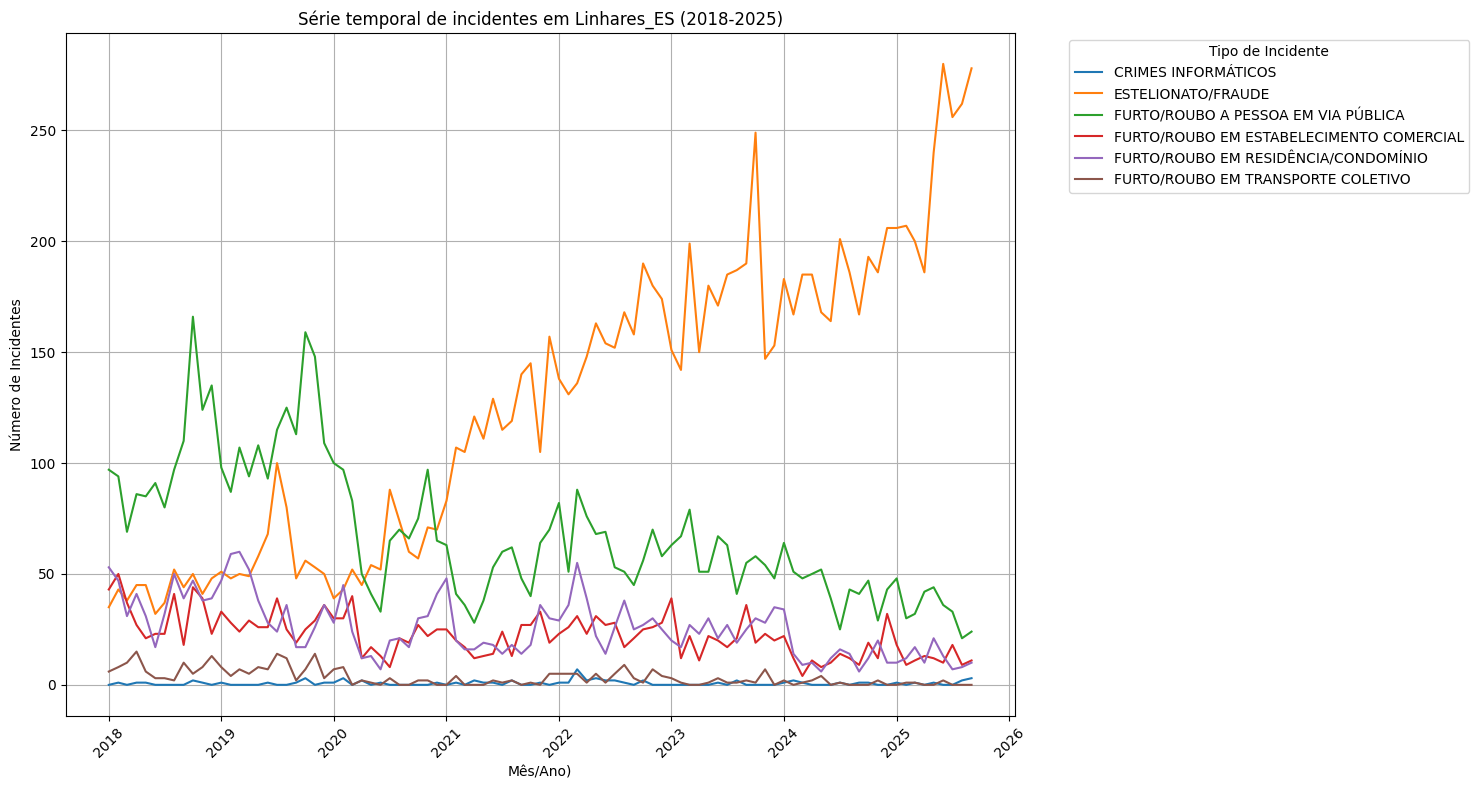

In [46]:
import matplotlib.pyplot as plt

# Carregar o Dataframe
df = pd.read_csv('Linhares_ES.csv')

# Remove colunas sem nome
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Converter coluna 'Dada' em objetos de formato ano - mês
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m', errors='coerce')

# Excluir linhas com NaT ("Not a Time" ou "Não é um Tempo") na coluna 'Dada'
df.dropna(subset=['Data'], inplace=True)

# Agrupar por mês e tipo de incidentes para obter a contagem
time_series_df = df.groupby([df['Data'].dt.to_period('M'), 'TipoIncidente']).size().unstack(fill_value=0)

# Plotar os dados da série temporal
plt.figure(figsize=(15, 8))
for column in time_series_df.columns:
    plt.plot(time_series_df.index.to_timestamp(), time_series_df[column], label=column)

# Configurar os rótulos e títulos do gráfico
plt.title('Série temporal de incidentes em Linhares_ES (2018-2025)')
plt.xlabel('Mês/Ano)')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Incidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)


**5. Série temporal mostrando a evolução dos incidentes de 'ESTELIONATO/FRAUDE' e 'ROUBO A PESSOA EM VIA PÚBLICA' em Linhares_ES, de 2018 até a data atual.**

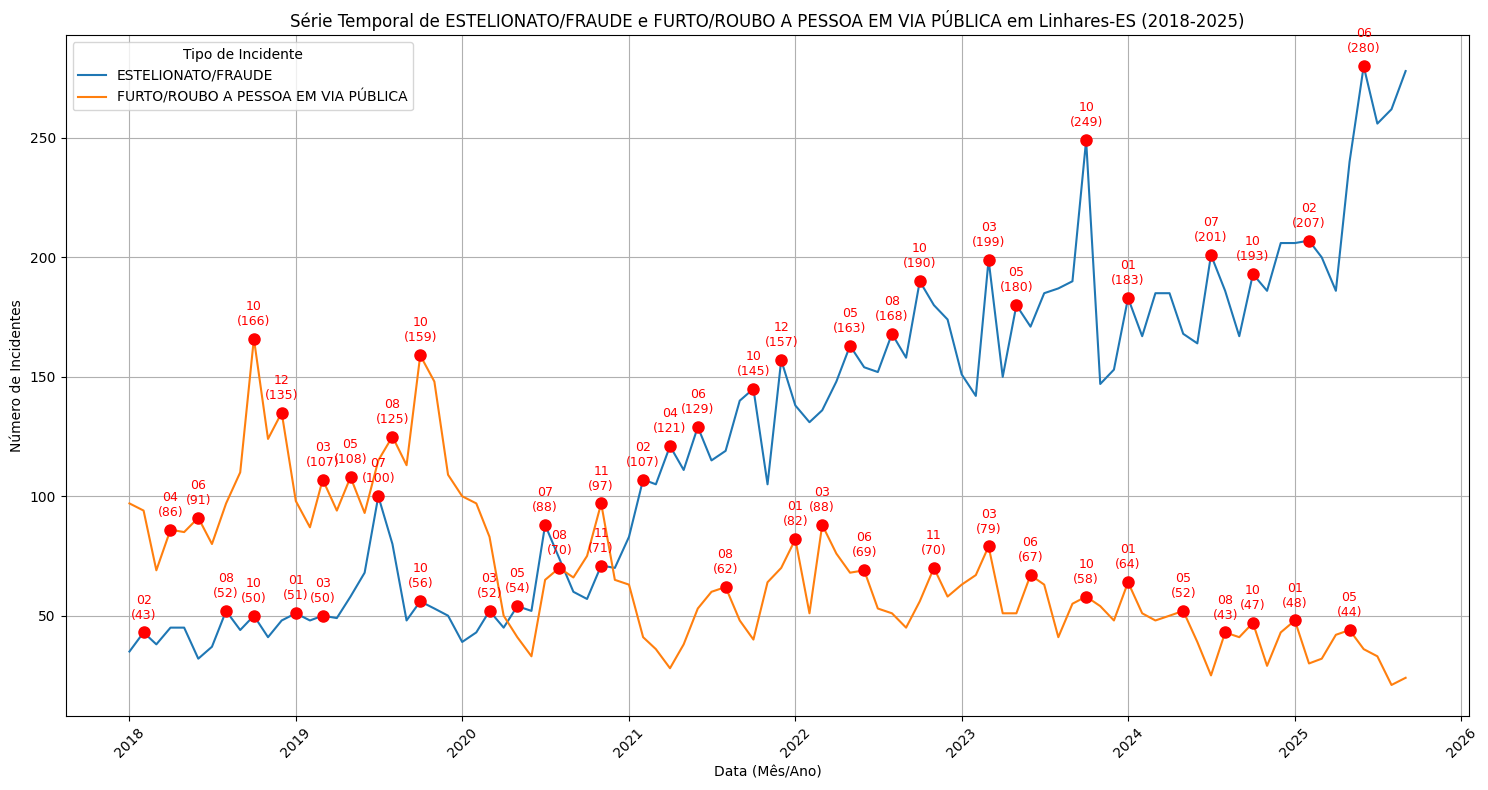

In [47]:
import matplotlib.pyplot as plt

# Carregar o Dataframe
df = pd.read_csv('Linhares_ES.csv')

# Filtrar para os tipos de incidentes especificados
incident_types = ['ESTELIONATO/FRAUDE', 'FURTO/ROUBO A PESSOA EM VIA PÚBLICA']
df_filtered = df[df['TipoIncidente'].isin(incident_types)].copy()

# Remove colunas sem nome
df_filtered = df_filtered.loc[:, ~df_filtered.columns.str.contains('^Unnamed')]

# Converter coluna 'Data' em objetos de formato ano - mês
df_filtered['Data'] = pd.to_datetime(df_filtered['Data'], format='%Y-%m', errors='coerce')

# Excluir linhas com NaT ("Not a Time" ou "Não é um Tempo") na coluna 'Data'
df_filtered.dropna(subset=['Data'], inplace=True)

# Agrupar por mês e tipo de incidentes definidos para obter a contagem
time_series_df = df_filtered.groupby([df_filtered['Data'].dt.to_period('M'), 'TipoIncidente']).size().unstack(fill_value=0)

# Converter o índice para timestamp para plotagem
time_series_df.index = time_series_df.index.to_timestamp()

# Plotar os dados da série temporal
plt.figure(figsize=(15, 8))
for column in time_series_df.columns:
    plt.plot(time_series_df.index, time_series_df[column], label=column)

    # Identificar picos (pontos onde o valor é maior que os vizinhos imediatos)
    data_values = time_series_df[column].values
    peaks = np.where((data_values[1:-1] > data_values[:-2]) & (data_values[1:-1] > data_values[2:]))[0] + 1

    # Adicionar os pontos de pico ao gráfico
    plt.plot(time_series_df.index[peaks], time_series_df[column].iloc[peaks], 'o', color='red', markersize=8)

    # Opcional: Adicionar anotações para os picos (mês e valor)
    for peak_index in peaks:
        date = time_series_df.index[peak_index].strftime('%m')
        value = time_series_df[column].iloc[peak_index]
        plt.annotate(f'{date}\n({value})',
                     (time_series_df.index[peak_index], value),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontsize=9,
                     color='red')


# Configurar os rótulos e títulos do gráfico
plt.title('Série Temporal de ESTELIONATO/FRAUDE e FURTO/ROUBO A PESSOA EM VIA PÚBLICA em Linhares-ES (2018-2025)')
plt.xlabel('Data (Mês/Ano)')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Incidente')
plt.tight_layout()
plt.grid(True)
plt.show()

**6. Gráficos de regressão linear para os casos de 'ESTELIONATO/FRAUDE' e 'ROUBO A PESSOA EM VIA PÚBLICA' em Linhares_ES.**

**Cada gráfico exibe os pontos de dados mensais e a linha de tendência de regressão linear correspondente**

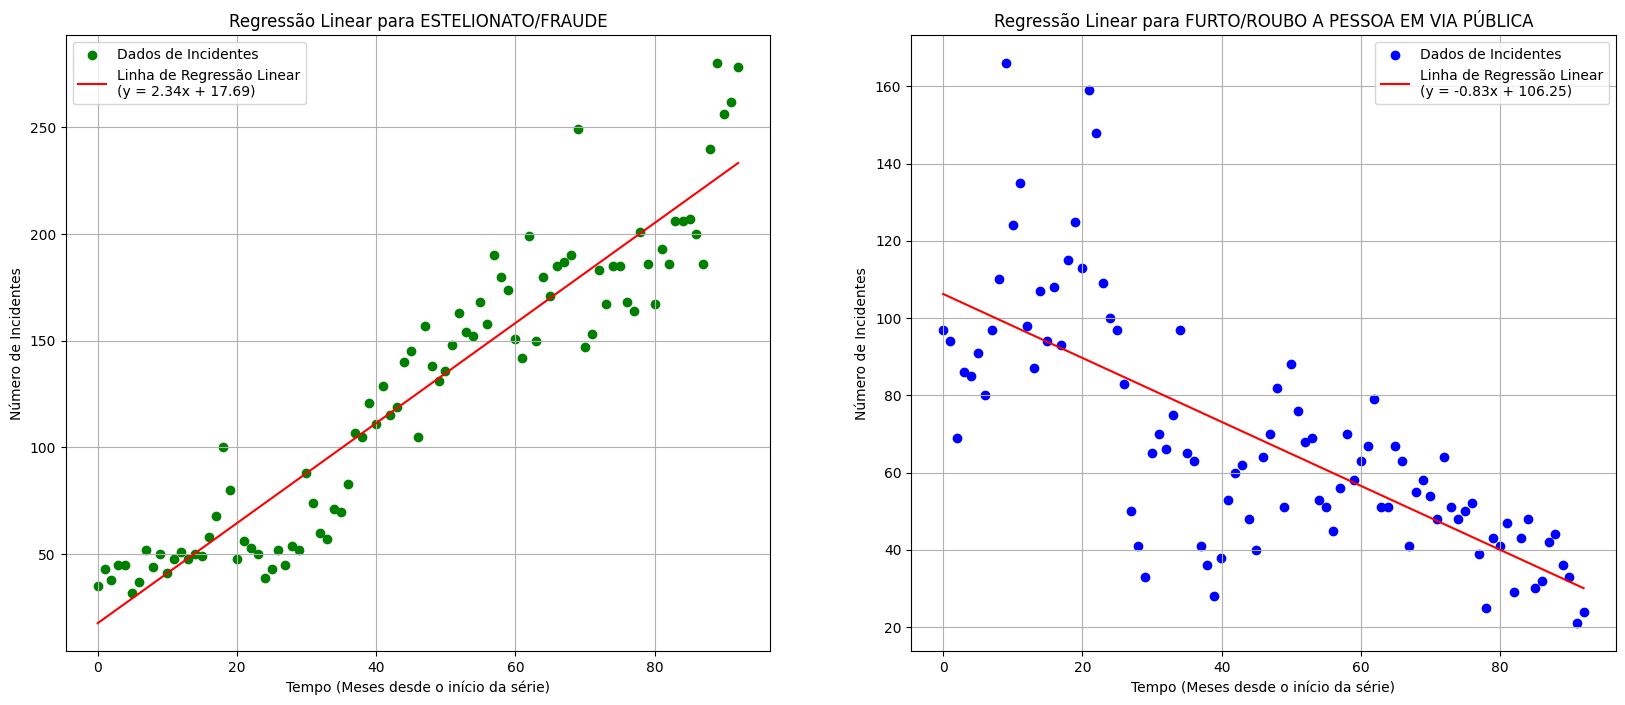

In [48]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Carregar o conjunto de dados
df = pd.read_csv('Linhares_ES.csv')

# Remover colunas sem nome
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Filtrar para os tipos de incidentes especificados
incident_types = ['ESTELIONATO/FRAUDE', 'FURTO/ROUBO A PESSOA EM VIA PÚBLICA']
df_filtered = df[df['TipoIncidente'].isin(incident_types)].copy()

# Converter a coluna 'Data' para objetos datetime
df_filtered['Data'] = pd.to_datetime(df_filtered['Data'], format='%Y-%m', errors='coerce')

# Remover linhas com NaT na coluna 'Data'
df_filtered.dropna(subset=['Data'], inplace=True)

# Agrupar por mês e tipo de incidente para obter a contagem
time_series_df = df_filtered.groupby([df_filtered['Data'].dt.to_period('M'), 'TipoIncidente']).size().unstack(fill_value=0)

# Converter o índice de tempo para um formato numérico para regressão (por exemplo, meses desde o início)
time_series_df.index = time_series_df.index.to_timestamp()
time_series_df['time_numeric'] = (time_series_df.index - time_series_df.index[0]).days / 30.44

# Criar uma figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar para 'ESTELIONATO/FRAUDE'
incident_type_estelionato = 'ESTELIONATO/FRAUDE'
if incident_type_estelionato in time_series_df.columns:
    y = time_series_df[incident_type_estelionato]
    x = time_series_df['time_numeric']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    axes[0].scatter(x, y, label='Dados de Incidentes', color='green')
    axes[0].plot(x, intercept + slope * x, 'r', label=f'Linha de Regressão Linear\n(y = {slope:.2f}x + {intercept:.2f})')
    axes[0].set_title(f'Regressão Linear para {incident_type_estelionato}')
    axes[0].set_xlabel('Tempo (Meses desde o início da série)')
    axes[0].set_ylabel('Número de Incidentes')
    axes[0].legend()
    axes[0].grid(True)
else:
    print(f"O tipo de incidente '{incident_type_estelionato}' não foi encontrado.")

# Plotar para 'FURTO/ROUBO A PESSOA EM VIA PÚBLICA'
incident_type_roubo = 'FURTO/ROUBO A PESSOA EM VIA PÚBLICA'
if incident_type_roubo in time_series_df.columns:
    y = time_series_df[incident_type_roubo]
    x = time_series_df['time_numeric']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    axes[1].scatter(x, y, label='Dados de Incidentes', color='blue')
    axes[1].plot(x, intercept + slope * x, 'r', label=f'Linha de Regressão Linear\n(y = {slope:.2f}x + {intercept:.2f})')
    axes[1].set_title(f'Regressão Linear para {incident_type_roubo}')
    axes[1].set_xlabel('Tempo (Meses desde o início da série)')
    axes[1].set_ylabel('Número de Incidentes')
    axes[1].legend()
    axes[1].grid(True)
else:
    print(f"O tipo de incidente '{incident_type_roubo}' não foi encontrado.")

plt.show()

**7. Trabalhando com previsão para ....**

**7.1. Gráfico de série temporal com pontos para os casos de 'ESTELIONATO/FRAUDE' no município de Linhares, ES. O gráfico exibe a contagem mensal desses incidentes ao longo do tempo.**

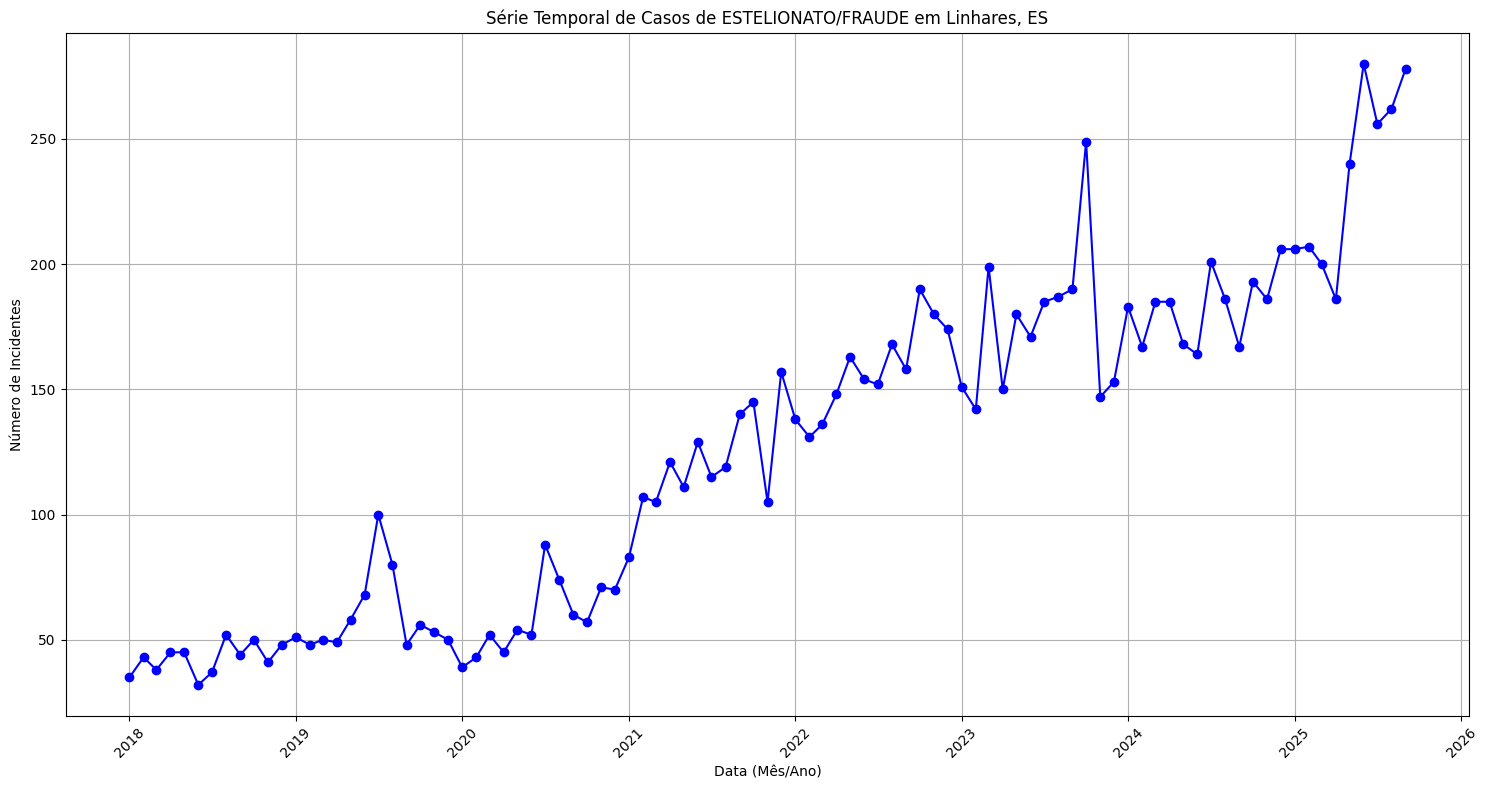

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar o conjunto de dados
df = pd.read_csv('Linhares_ES.csv')

# Remover colunas sem nome
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Filtrar para o tipo de incidente e município especificados
df_filtered = df[(df['TipoIncidente'] == 'ESTELIONATO/FRAUDE') & (df['Municipio'] == 'LINHARES')].copy()

# Converter a coluna 'Data' para objetos datetime
df_filtered['Data'] = pd.to_datetime(df_filtered['Data'], format='%Y-%m', errors='coerce')

# Remover linhas com NaT na coluna 'Data'
df_filtered.dropna(subset=['Data'], inplace=True)

# Agrupar por mês para obter a contagem de incidentes
time_series_df = df_filtered.groupby(df_filtered['Data'].dt.to_period('M')).size().reset_index(name='contagem_incidentes')
time_series_df['Data'] = time_series_df['Data'].dt.to_timestamp()

# Plotar os dados da série temporal com pontos
plt.figure(figsize=(15, 8))
plt.plot(time_series_df['Data'], time_series_df['contagem_incidentes'], marker='o', linestyle='-', color='b')

# Configurar rótulos e título do gráfico
plt.title('Série Temporal de Casos de ESTELIONATO/FRAUDE em Linhares, ES')
plt.xlabel('Data (Mês/Ano)')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

**8. Previsões**

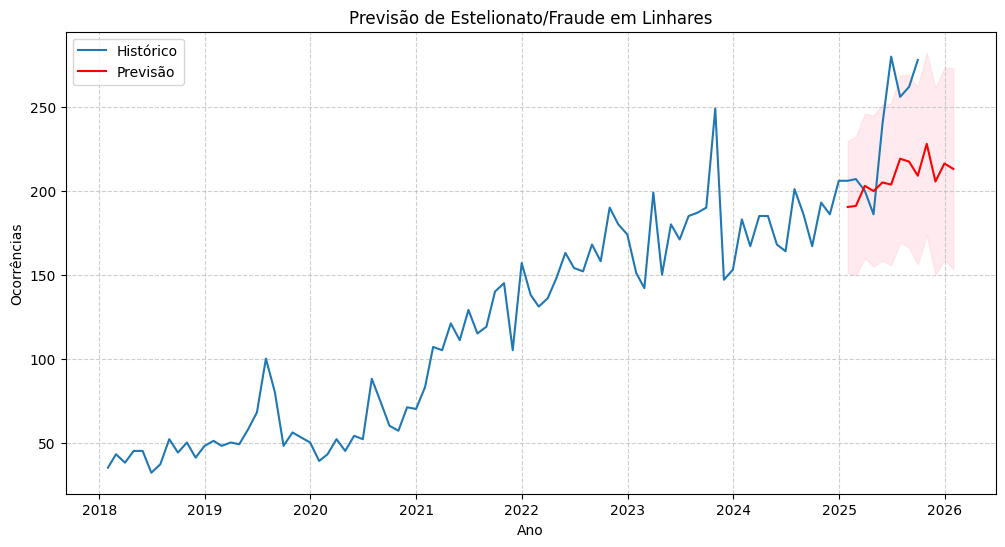

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import MonthEnd

# 1. Lendo os dados
df = pd.read_csv("/content/Linhares_ES.csv")

# 2. Garantindo que datas sejam interpretadas corretamente
if 'Data' in df.columns:
    df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
else:
    raise ValueError("Não encontrei a coluna 'Data' no arquivo. Verifique o cabeçalho.")

# 3. Filtrando apenas Linhares e tipo estelionato/fraude
filtro = (df['Municipio'].str.upper() == 'LINHARES') & (df['TipoIncidente'].str.contains('ESTELIONATO|FRAUDE', case=False, na=False))
df = df[filtro].copy()

# 4. Criando série temporal mensal
df['Mes'] = df['Data'] + MonthEnd(0)
ts = df.groupby('Mes').size()
ts = ts[ts.index >= '2018-01-01']  # apenas dados a partir de 2018

# Explicitly set the frequency to Month End to suppress the warning
ts = ts.asfreq('ME')

# 5. Separando treino (até 2024-12) e valores reais (todos os dados após o treino)
train = ts[ts.index <= '2024-12-31']
real = ts[ts.index > '2024-12-31'] # Inclui todos os dados após a data final do treino

# 6. Ajustando modelo SARIMA
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

# 7. Fazendo previsão para o período dos dados reais e além, se necessário.
# Para garantir que a previsão cubra todo o período de 'real' e vá até o final de 2025,
# vamos definir o número de passos da previsão com base na data final desejada (fim de 2025).
last_real_date = ts.index.max()
end_forecast_date = pd.to_datetime('2025-12-31')
# Calcular o número de meses entre o último dado de treino e a data final desejada
steps_to_forecast = (end_forecast_date.to_period('M') - train.index.max().to_period('M')).n +1

forecast = results.get_forecast(steps=steps_to_forecast)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


# 8. Plotando resultados (gráfico da célula R1llJN5g3Wdk)
plt.figure(figsize=(12,6))
plt.plot(ts.index, ts, label="Histórico")
plt.plot(forecast_mean.index, forecast_mean, label="Previsão", color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title("Previsão de Estelionato/Fraude em Linhares")
plt.xlabel("Ano")
plt.ylabel("Ocorrências")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**métricas globais (MAE, RMSE, MAPE)**

MAE (Mean Absolute Error) → erro absoluto médio

RMSE (Root Mean Squared Error) → raiz do erro quadrático médio

MAPE (Mean Absolute Percentage Error) → erro percentual médio absoluto

In [51]:
from tabulate import tabulate
import numpy as np
import pandas as pd # Importar pandas caso não esteja importado nesta célula

# Comparando previsão vs valores reais
# Garantir que 'real' e 'forecast_mean' tenham nomes para facilitar a união
real.name = 'Real'
forecast_mean.name = 'Previsto'

# Criar um DataFrame combinando real e previsto com base nos índices
# Isso garantirá que todos os meses presentes em qualquer uma das séries estejam na comparação
comparacao = pd.concat([real, forecast_mean], axis=1)


# Para cálculo das métricas, vamos considerar apenas as linhas onde AMBOS Real e Previsto NÃO são NaN
comparacao_valid = comparacao.dropna(subset=["Real", "Previsto"]).copy() # Adicionado .copy() para evitar SettingWithCopyWarning


# Arredondando para inteiros nos dados válidos para cálculo de métricas
# Usamos .loc para evitar SettingWithCopyWarning
comparacao_valid.loc[:, "Real"] = comparacao_valid["Real"].astype(int)
comparacao_valid.loc[:, "Previsto"] = comparacao_valid["Previsto"].round().astype(int)
comparacao_valid.loc[:, "Erro Absoluto"] = (comparacao_valid["Real"] - comparacao_valid["Previsto"]).abs()


# Exibir a tabela comparando valores reais e previstos (incluindo meses com NaN para visualização)
# Usaremos a tabela 'comparacao' original que pode conter NaN para exibir
# Arredondando 'Previsto' para exibição na tabela completa, lidando com NaN
comparacao["Previsto"] = comparacao["Previsto"].round().astype(pd.Int64Dtype()) # Usar Int64Dtype para permitir NaN

# Calcular Erro Absoluto para exibição onde ambos Real e Previsto são não-NaN
comparacao["Erro Absoluto"] = (comparacao["Real"] - comparacao["Previsto"]).abs()


print("Tabela comparando valores reais e previstos (valores inteiros onde possível):\n")
# Formatar a tabela para exibir valores inteiros e NaN onde apropriado
print(tabulate(comparacao, headers="keys", tablefmt="grid", showindex=True, floatfmt=".0f"))


# Cálculo das métricas globais usando apenas os dados válidos
if not comparacao_valid.empty:
    mae = np.mean(comparacao_valid["Erro Absoluto"])
    rmse = np.sqrt(np.mean((comparacao_valid["Real"] - comparacao_valid["Previsto"])**2))

    # Cálculo do MAPE: Evitar divisão por zero onde o valor real é zero
    mape = np.mean(np.abs(comparacao_valid["Real"] - comparacao_valid["Previsto"]) / comparacao_valid["Real"].replace(0, np.nan)) * 100
    mape = np.nan_to_num(mape, nan=np.inf) # Substituir NaN resultante de 0/0 por Inf, se necessário

    print("\nMétricas globais de erro (calculadas apenas para meses com dados reais e previstos):\n")
    print(f"MAE  (Erro Absoluto Médio): {mae:.2f}")
    print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
    if np.isinf(mape):
        print(f"MAPE (Erro Percentual Médio Absoluto): Inf (divisão por zero ou NaN)")
    else:
        print(f"MAPE (Erro Percentual Médio Absoluto): {mape:.2f}%")

else:
    print("\nNão há meses com dados reais e previstos disponíveis para calcular as métricas de erro.")

Tabela comparando valores reais e previstos (valores inteiros onde possível):

+---------------------+--------+------------+-----------------+
|                     |   Real |   Previsto | Erro Absoluto   |
+=====================+========+============+=================+
| 2025-01-31 00:00:00 |    206 |        190 | 16.0            |
+---------------------+--------+------------+-----------------+
| 2025-02-28 00:00:00 |    207 |        191 | 16.0            |
+---------------------+--------+------------+-----------------+
| 2025-03-31 00:00:00 |    200 |        203 | 3.0             |
+---------------------+--------+------------+-----------------+
| 2025-04-30 00:00:00 |    186 |        200 | 14.0            |
+---------------------+--------+------------+-----------------+
| 2025-05-31 00:00:00 |    240 |        205 | 35.0            |
+---------------------+--------+------------+-----------------+
| 2025-06-30 00:00:00 |    280 |        204 | 76.0            |
+---------------------+--

**Reasoning**:
Load the dataframe and calculate the frequency and proportion of each incident type.



In [52]:
# 1. Carregar o dataframe Linhares_ES.csv em um novo dataframe.
df_linhares = pd.read_csv('Linhares_ES.csv')

# Remove colunas sem nome
df_linhares = df_linhares.loc[:, ~df_linhares.columns.str.contains('^Unnamed')]

# 2. Conte a frequência de cada TipoIncidente no dataframe e armazene o resultado em uma variável.
incident_counts = df_linhares['TipoIncidente'].value_counts()

# 3. Calcule a proporção de cada tipo de incidente em relação ao total de incidentes.
incident_proportions = incident_counts / incident_counts.sum()

# 4. Exiba os tipos de incidentes mais frequentes e suas respectivas proporções.
print("Frequência de Incidentes em Linhares:")
display(incident_counts)

print("\nProporção de Incidentes em Linhares:")
display(incident_proportions)

Frequência de Incidentes em Linhares:


,count
TipoIncidente,
ESTELIONATO/FRAUDE,11665
FURTO/ROUBO A PESSOA EM VIA PÚBLICA,6341
FURTO/ROUBO EM RESIDÊNCIA/CONDOMÍNIO,2400
FURTO/ROUBO EM ESTABELECIMENTO COMERCIAL,2080
FURTO/ROUBO EM TRANSPORTE COLETIVO,307
CRIMES INFORMÁTICOS,68



Proporção de Incidentes em Linhares:


,count
TipoIncidente,
ESTELIONATO/FRAUDE,0.510258
FURTO/ROUBO A PESSOA EM VIA PÚBLICA,0.277372
FURTO/ROUBO EM RESIDÊNCIA/CONDOMÍNIO,0.104982
FURTO/ROUBO EM ESTABELECIMENTO COMERCIAL,0.090985
FURTO/ROUBO EM TRANSPORTE COLETIVO,0.013429
CRIMES INFORMÁTICOS,0.002974
